In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
cap = cv2.VideoCapture("out.mp4")
if (cap.isOpened() == False):
    print('Error opening video stream or file')

In [6]:
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
print('frames: %s' % n_frames)
print('size: %s x %s' % (w, h))
print('fps: %d' % fps)
print('seconds: %d' % (n_frames / fps))

frames: 72
size: 1920 x 1080
fps: 30
seconds: 2


In [197]:
cell_size = 60
print(w / cell_size, h / cell_size, )
grid_h = int(h / cell_size)
grid_w = int(w / cell_size)
focus_grid = np.zeros(shape=(n_frames, grid_h, grid_w))

32.0 18.0


In [198]:
i = 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
while(cap.isOpened()):
    ret, src = cap.read()
    if ret == True:
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        for j in range(grid_h):
            for k in range(grid_w):
                focus_grid[i,j,k] = cv2.Laplacian(
                    src_gray[j*cell_size:(j+1)*cell_size, k*cell_size:(k+1)*cell_size],
                    cv2.CV_16S, ksize=3).var()
        i += 1
    # Break the loop
    else:
        break

<IPython.core.display.Javascript object>


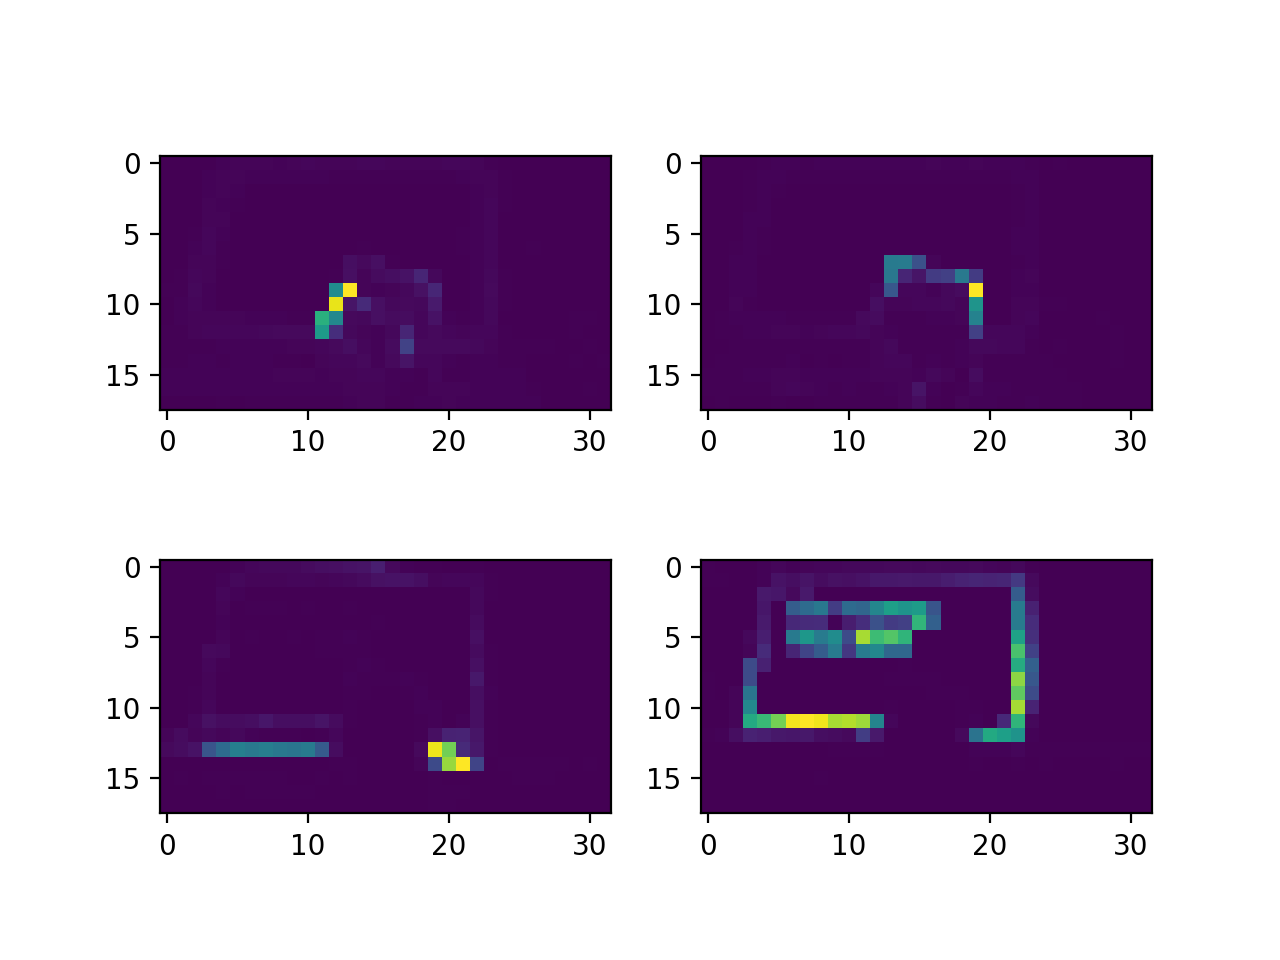

In [199]:
f, axarr = plt.subplots(2,2) 

axarr[0,0].imshow(focus_grid[0])
axarr[0,1].imshow(focus_grid[16])
axarr[1,0].imshow(focus_grid[30])
axarr[1,1].imshow(focus_grid[50])

<IPython.core.display.Javascript object>


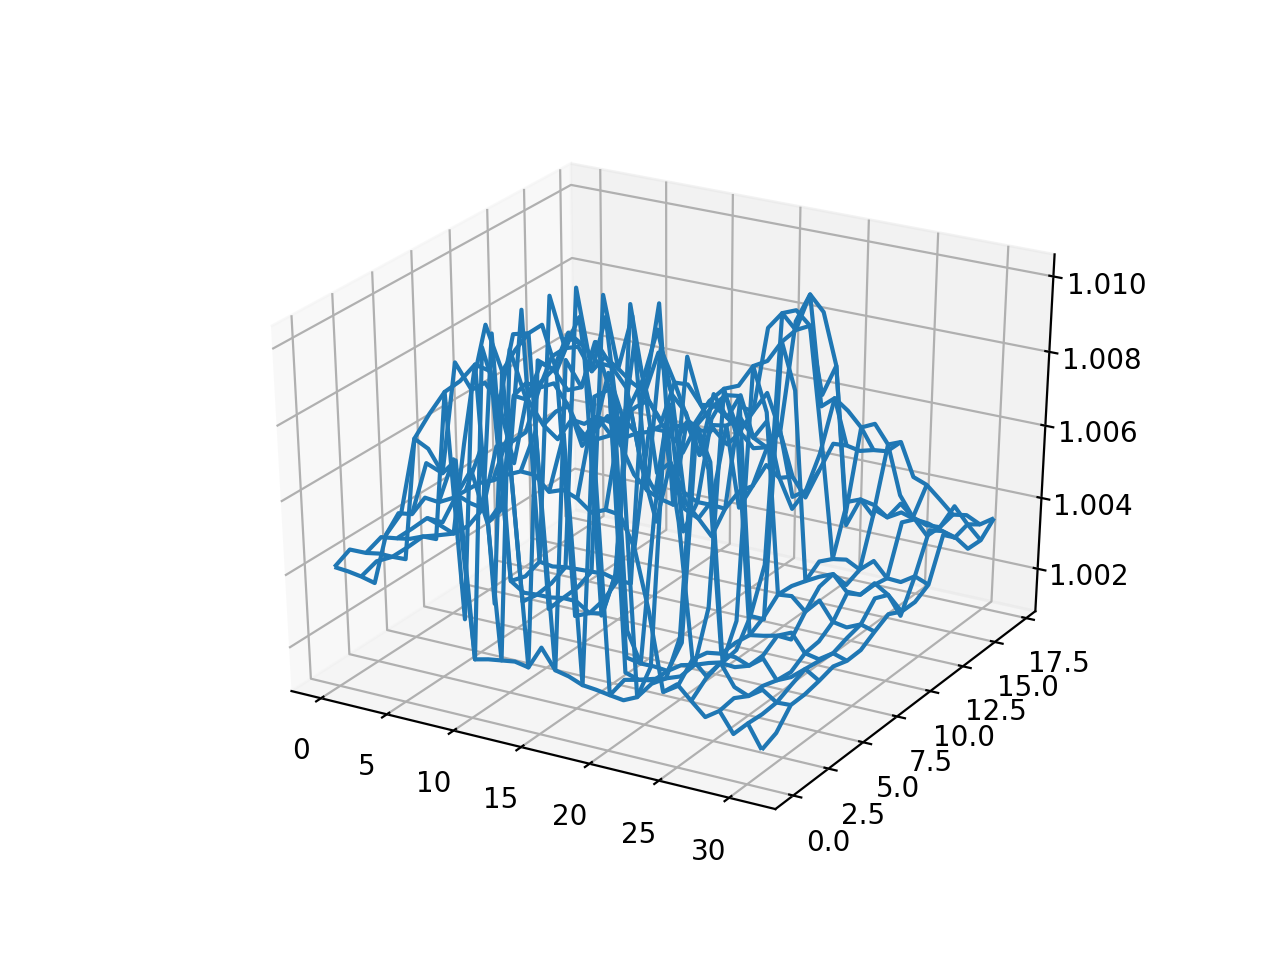

In [200]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y, Z = (
    np.arange(grid_w).reshape((1,grid_w)).repeat(grid_h, axis=0),
    np.arange(grid_h).reshape((grid_h,1)).repeat(grid_w, axis=1),
    np.power(focus_grid.max(axis=0), .001)
)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

plt.show()

In [140]:
np.around(axes3d.get_test_data(0.05)[0][:,0])

array([-30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.,
       -30., -30., -30., -30., -30., -30., -30., -30., -30., -30.])

In [149]:
np.power(focus_grid.max(axis=0), .01).max()

1.1088024845830484

In [182]:
focus_grid.argmax(axis=0).shape

(36, 64)

In [183]:
36 * 64

2304

In [201]:
numpy.savetxt('out.txt', focus_grid.argmax(axis=0), fmt='%d', delimiter=' ', newline='\n')

<IPython.core.display.Javascript object>


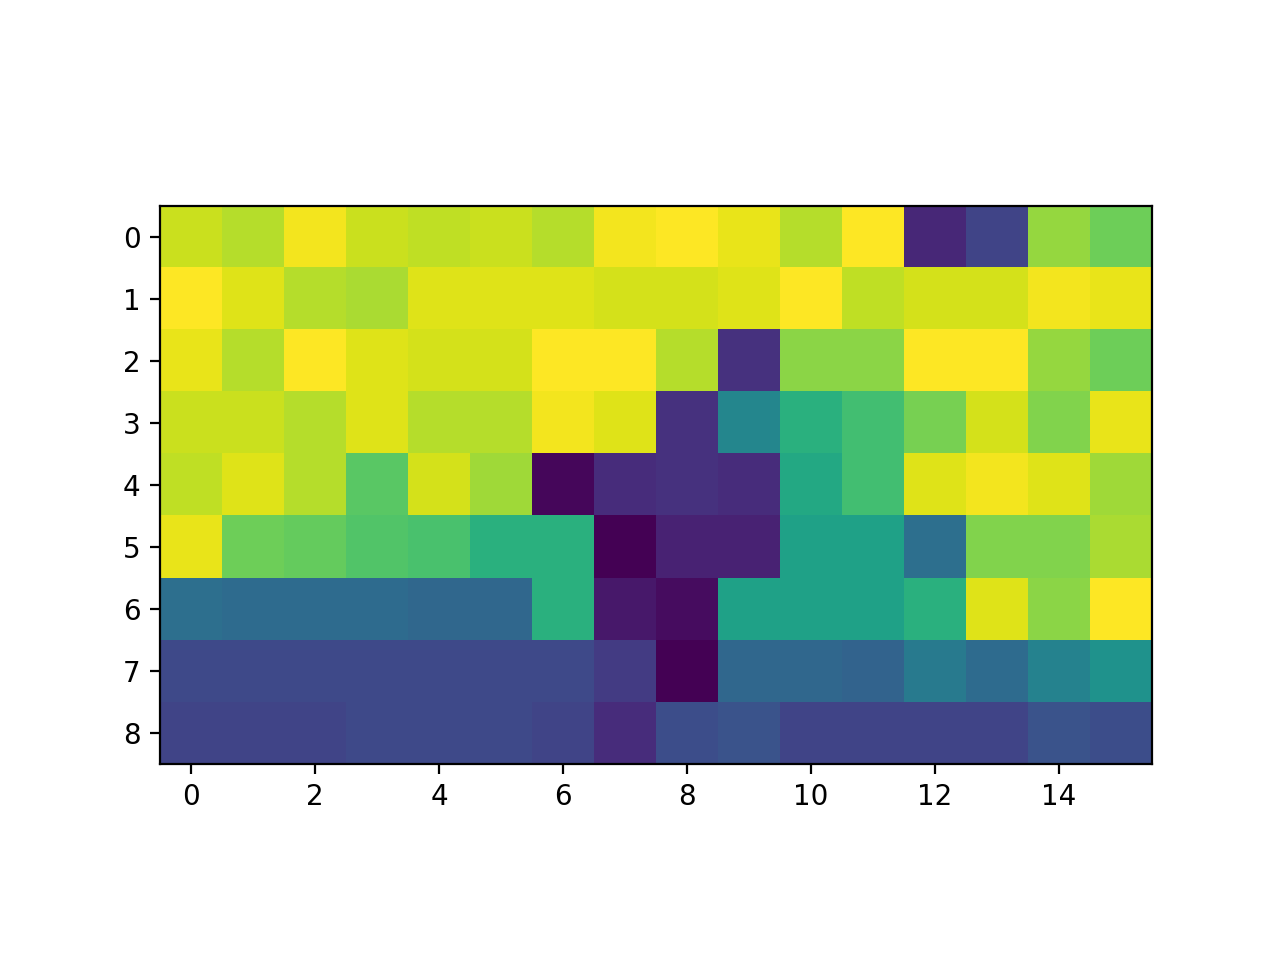

In [195]:
plt.imshow(focus_grid.argmax(axis=0))